![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# Session 3: Python databases, SQLite

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-10-07)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/03_Python_databases_Sqlite_with_solutions.ipynb)


**Sources of this teaching material:**
* [Amazing SentDex!](https://pythonprogramming.net/)
* [SQLite documentation](https://www.sqlite.org/docs.html)

# SQL recap

## SQL Cheat Sheet

A good [SQL Cheat Sheet](https://github.com/enochtangg/quick-SQL-cheatsheet)

## SQL is case insensitive
QL keywords are NOT case sensitive: select is the same as SELECT


## Use semicolon 
Some database systems require a semicolon at the end of each SQL statement.

Semicolon is the standard way to separate each SQL statement in database systems that allow more than one SQL statement to be executed in the same call to the server.


## Some of the most important SQL commands
* SELECT - extracts data from a database
* UPDATE - updates data in a database
* DELETE - deletes data from a database
* INSERT INTO - inserts new data into a database
* CREATE DATABASE - creates a new database
* CREATE TABLE - creates a new table
* ALTER TABLE - modifies a table
* DROP TABLE - deletes a table
* CREATE INDEX - creates an index (search key)
* DROP INDEX - deletes an index

### SELECT

#### Selects everything from a table
`SELECT * FROM table_name;`

#### Selects the specified column from a table
`SELECT col1, col2 FROM table_name;`

### UPDATE
Updates the existing records within a table in a database


```
UPDATE table_name
SET column1 = value1, column2 = 'value2', ...
WHERE TableID=1;
```





### DELETE
Deletes registries in a table based on a condition

`DELETE FROM table_name WHERE condition;`

Delete all records

`DELETE FROM table_name;`


### INSERT INTO
The INSERT INTO SELECT statement copies data from one table and inserts it into another table.

INSERT INTO SELECT requires that data types in source and target tables match
The existing records in the target table are unaffected

#### Copies all columns from one table to another table

```
INSERT INTO table2
SELECT * FROM table1
WHERE condition;
```


#### Copies only some columns from one table into another table
```
INSERT INTO table2 (column1, column2, column3, ...)
SELECT column1, column2, column3, ...
FROM table1
WHERE condition;
```

### CREATE DATABASE

`CREATE DATABASE databasename;`


### CREATE TABLE

```
CREATE TABLE table_name (
    column1 datatype,
    column2 datatype,
    column3 datatype,
   ....
);
```

### ALTER TABLE

The ALTER TABLE statement is used to add, delete, or modify columns in an existing table.

The ALTER TABLE statement is also used to add and drop various constraints on an existing table.

#### ADD Column
```
ALTER TABLE table_name
ADD column_name datatype;
```


The following SQL adds an "Email" column to the "Customers" table:
```
ALTER TABLE Customers
ADD Email varchar(255);
```

#### DROP COLUMN
To delete a column in a table, use the following syntax (notice that some database systems don't allow deleting a column):

```
ALTER TABLE table_name
DROP COLUMN column_name;
```

The following SQL deletes the "Email" column from the "Customers" table:

```
ALTER TABLE Customers
DROP COLUMN Email;
```

#### ALTER/MODIFY COLUMN
To change the data type of a column in a table, use the following syntax:
```
ALTER TABLE table_name
ALTER COLUMN column_name datatype;
```

### CREATE INDEX
Creates an index on a table
```
CREATE INDEX index_name
ON table_name (column1, column2, ...);
```

### DROP INDEX
Drop an index
```
DROP INDEX index_name ON table_name;
```

# MySQL vs. SQLite
Databases offer, typically, a superior method of **high-volume data input and output over a typical file** such as a text file or a CSV file. 

SQLite is a "light" version that works based on SQL syntax. SQL is a programming language in itself, but is a very popular database language. 

SQLite truly shines because it is extremely lightweight. Setting up an SQLite database is nearly instant, there is no server to set up, no users to define, and no permissions to concern yourself with. 

For this reason, it is often used as a developmental and protyping database, but it can and is used in production. The main issue with SQLite is that it winds up being much like any other flat-file, so high volume input/output, especially with simultaneous queries, can be problematic and slow. 

You may then ask, what really is the difference between a typical file and sqlite. First, SQLite will let you structure your data as a database, which can easily be queried, so you get that functionality both with adding new content and calling upon it later. Each table would likely need its own file if you were doing plain files, and SQLite is all in one. 

SQLite is also going to be buffering your data. A flat file will require a full load before you can start querying the full dataset, SQLite files don't work that way. Finally, edits do not require the entire file to be re-saved, it's just that part of the file. This improves performance significantly. 

[Source](http://sentdex.com/)

# Intro to SQLite

## Creating our first database
First of all we need to create a connection and a cursor. And this is true for both MySQL and SQLite.

The database, if it does exist, it will not be overwritten or re-created. Next, we defined the cursor. Think of the cursor like your mouse cursor, it simply does things, like select things, delete things, add things, and so on. Now, most people think of a database, and think of rows and columns of data. That's actually a table. Tables go in databases, and data goes in the tables. A database may only contain a single table, or it may contain a thousand tables.

[Source](http://sentdex.com/)

In [0]:
import sqlite3

#Cursor is like a computer cursor

conn = sqlite3.connect('trial.db')
c = conn.cursor()

## Create a table within a database
The above code creates a table, called BTSisCool, if it doesn't exist. This table contains the following rows: unix, datestamp, keyword, and value. Each column is assigned a datatype. In our case, unix is a REAL, which is like a Python float, then we have some TEXT variables, and another REAL. 

SQLite only has 5 major types:

* NULL. The value is a NULL value.

* INTEGER. The value is a signed integer, stored in 1, 2, 3, 4, 6, or 8 bytes depending on the magnitude of the value.

* REAL. The value is a floating point value, stored as an 8-byte IEEE floating point number.

* TEXT. The value is a text string, stored using the database encoding (UTF-8, UTF-16BE or UTF-16LE).

* BLOB. The value is a blob of data, stored exactly as it was input.

MySQL has many multiples more. You may be curious why all variables are not something like "text" or why we don't use "blob" for everything. The idea is that, if we know it will be only integers, then we can assign a datatype that will help to keep the file size as compressed as possible, as well as keeping input/output operations as quick as possible. 

In [0]:
def create_table():
    c.execute("CREATE TABLE IF NOT EXISTS BTSisCool(unix REAL, datestamp TEXT, keyword TEXT, value REAL)")

### Insert data into the table

We will execute a SQL query with the cursor. This one is an INSERT INTO, and the table name follows. Then, we insert a tuple of values. After inserting we use conn.commit(). Think of conn.commit() much like saving the document. 

Recall how SQLite works. You have a file part before actually committing. You do not need to commit after every INSERT. Instead, you commit when you are done with that specific insertion task. You then close the cursor, and connection when you are totally done. 

If you may be doing more inserts in a moment, then there's no reason to close the connection. If instead you are using SQLite on a registration page, for example, once the user has registered, you wouldn't want to leave that connection open wasting memory, you'd want to close it off.

In [0]:
def data_entry():
    c.execute("INSERT INTO BTSisCool VALUES(1452549219,'2016-01-11 13:53:39','Python',6)")
    conn.commit()
    c.close()
    conn.close()

In [0]:
create_table()
data_entry()

### Visualize the table

Let's visualize the table we have just created

In [0]:
def visualize(database, query):
    connection = sqlite3.connect(database) 
    viz_cursor = connection.cursor()
    viz_cursor.execute(query)
    connection.commit()
    
    rows = viz_cursor.fetchall()
    
    for row in rows:
        print(row)
    
    viz_cursor.close()
    connection.close()

In [0]:
trial_database = 'trial.db'
SQL_call = "SELECT * FROM 'BTSisCool'"

visualize(database=trial_database, query=SQL_call)

(1452549219.0, '2016-01-11 13:53:39', 'Python', 6.0)


In [0]:
trial_database = 'trial.db'
SQL_call = "SELECT unix FROM BTSisCool"

visualize(database=trial_database, query=SQL_call)

(1452549219.0,)


### Better ways to visualize: SQLite browser

Check it out [here](https://sqlitebrowser.org/) or also within SQLite use:

`cursor.execute('SELECT * FROM SQLite_master')`

`data = cursor.fetchall()`

`print(data)`

To print whatever table and indexes are within the database.


## Dynamic insertion into a Database

Since we have the power of Python, we can dynamically insert some data into our database. In the `dynamic_data_entry` function,  we set some variables, then we execute a slightly different SQL query. 

Note that we are using ? for the variable input. With MySQL, you'd be using %s instead. At the end, we commit.

In [0]:
import sqlite3
import time
import datetime
import random

def create_database(db_name):
    connection = sqlite3.connect(db_name)
    cursor = connection.cursor()
    
    return connection, cursor

def create_table(db_name):
    # Call the create database function
    connection, cursor = create_database(db_name)
    
    cursor.execute("CREATE TABLE IF NOT EXISTS BTSisCool(unix REAL, datestamp TEXT, keyword TEXT, value REAL)")
    
    return connection, cursor

def dynamic_data_entry(db_name):
    # Call the create table function
    connection, cursor = create_table(db_name)

    unix = int(time.time())
    date = str(datetime.datetime.fromtimestamp(unix).strftime('%Y-%m-%d %H:%M:%S'))
    keyword = 'Python'
    value = random.randrange(0,10)

    cursor.execute("INSERT INTO BTSisCool(unix, datestamp, keyword, value) VALUES (?, ?, ?, ?)",
          (unix, date, keyword, value))

    connection.commit()
    
    return connection, cursor


In [0]:
database_name = 'trial_BTS.db'

for i in range(10):
    connection, cursor = dynamic_data_entry(db_name=database_name)
    time.sleep(1)

cursor.close
connection.close()

#### Let's visualize it using the function we created

In [0]:
trial_database = database_name
SQL_call = "SELECT value, datestamp FROM BTSisCool WHERE unix > 1452554972"

visualize(database=trial_database, query=SQL_call)

(4.0, '2019-10-06 13:51:06')
(9.0, '2019-10-06 13:51:07')
(7.0, '2019-10-06 13:51:08')
(2.0, '2019-10-06 13:51:09')
(0.0, '2019-10-06 13:51:10')
(8.0, '2019-10-06 13:51:11')
(0.0, '2019-10-06 13:51:12')
(4.0, '2019-10-06 13:51:13')
(6.0, '2019-10-06 13:51:14')
(2.0, '2019-10-06 13:51:15')


## Plotting directly from database

Some good cheat sheet on [Python strftime](http://strftime.org/), to remember the datetime and timedeltas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from dateutil import parser
from matplotlib import style

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
    
style.use('ggplot')

def graph_data(database, query, dateformat):
    """
    :param database: the string name of the database
    :param query: the query to perform over the database
    :param dateformat: the dateformat to plot the graph in srtftime

    :returns: a graph
    """

    # Connect to database
    connection = sqlite3.connect(database) 

    # Establish the cursor
    graph_cursor = connection.cursor()

    # Execute and commit the query
    graph_cursor.execute(query)
    connection.commit()

    # Fetch all the data from the cursor
    data = graph_cursor.fetchall()

    # Create two empty lists where we will store the data
    times = []
    values = []
    
    # Loop through rows in the data
    """
    For every row in the data, append to time and values lists
    """
    for row in data:
        times.append(parser.parse(row[0]))
        values.append(row[1])

    # We create series with our dates and values
    ser = pd.Series(values,  index = times)

    # Create figure and axis with matplotlib
    fig, ax = plt.subplots()

    # Set each xtick every two seconds
    seconds = mdates.SecondLocator(interval=2)

    # Format the labels as whatever you put in dateformat argument
    h_fmt = mdates.DateFormatter(dateformat)

    # Plot the series
    ser.plot(ax = ax, color = 'red', linewidth = 0.9, x_compat=True)
    
    #Then tick and format with matplotlib: setting major locator and label formatter
    ax.xaxis.set_major_locator(seconds)
    ax.xaxis.set_major_formatter(h_fmt)

    # Autoformat labels so they do not overlap
    fig.autofmt_xdate()

    # Show the figure
    plt.show()
    
    # Close the cursor and the connection
    graph_cursor.close
    connection.close()


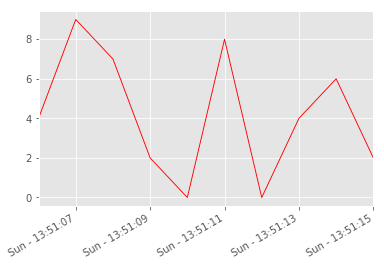

In [0]:
db = database_name
sql_query = 'SELECT datestamp, value FROM BTSisCool'
dateformatter = '%a - %H:%M:%S'

graph_data(database=db, query=sql_query, dateformat=dateformatter)

### EXCURSUS: playing with time tick ranges

##### Setting ticks and using purely matplotlib

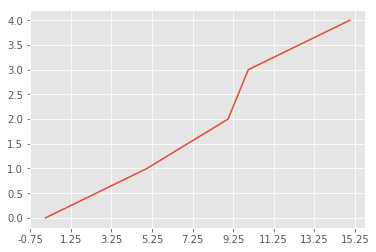

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

x = [0,5,9,10,15]
y = [0,1,2,3,4]

fig, ax = plt.subplots()
ax.plot(x,y)
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 2))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.show()

##### Setting ticks and using pandas

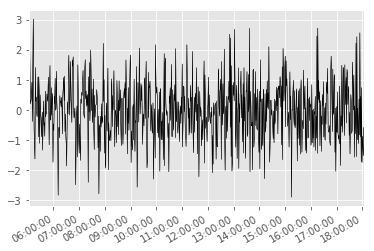

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

idx = pd.date_range('2019-12-08 05:03', '2019-12-08 18:03', freq = 'min')
df = pd.Series(np.random.randn(len(idx)),  index = idx)

fig, ax = plt.subplots()
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')

ax.plot(df.index, df.values, color = 'black', linewidth = 0.4)
#or use
df.plot(ax = ax, color = 'black', linewidth = 0.4, x_compat=True)
#Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)

fig.autofmt_xdate()
plt.show()

## Modifying registries in a database

It is important to note that **there are no undos** when it comes to SQL. Once you delete something, or once you modify it, that's that. Take your time, read over, and re-read your queries before you do them!

Also you can create a copy of the database and play with SQL queries within SQLite browser.

### Creating a backup with Python shutil

In [0]:
import sqlite3
import shutil
import time
import os

def sqlite3_backup(db_name, unlock=True):
    """Create timestamped database copy"""

    # Connect to database
    connection, cursor = create_database(db_name)

    # Create a name for new db
    backup_file = os.path.splitext(db_name)[0] + time.strftime("-%Y%m%d-%H%M%S") + os.path.splitext(db_name)[1]
    
    # Lock database before making a backup
    """
    #Transactions lock databases. See more here: https://www.sqlite.org/lang_transaction.html
    """
    cursor.execute('BEGIN IMMEDIATE;')

    # Make new backup file
    shutil.copyfile(db_name, backup_file)
    print ("\nCreating {}...".format(backup_file))

    # Some logic to reopen/close connection
    if unlock is True:
        print("Rolling back connection to main db")
        connection.rollback()
    elif unlock is False:
        print("Closing main DB")
        cursor.close()
        connection.close()


In [0]:
database_name = 'trial_BTS.db'

sqlite3_backup(db_name=database_name, unlock=False)


Creating trial_BTS-20191006-135137.db...
Closing main DB


### Visualize the database using the function created above

In [0]:
database_backup = "trial_BTS-20191006-135137.db"
SQL_call = 'SELECT * FROM BTSisCool'

visualize(database=database_backup, query=SQL_call)

(1570369866.0, '2019-10-06 13:51:06', 'Python', 4.0)
(1570369867.0, '2019-10-06 13:51:07', 'Python', 9.0)
(1570369868.0, '2019-10-06 13:51:08', 'Python', 7.0)
(1570369869.0, '2019-10-06 13:51:09', 'Python', 2.0)
(1570369870.0, '2019-10-06 13:51:10', 'Python', 0.0)
(1570369871.0, '2019-10-06 13:51:11', 'Python', 8.0)
(1570369872.0, '2019-10-06 13:51:12', 'Python', 0.0)
(1570369873.0, '2019-10-06 13:51:13', 'Python', 4.0)
(1570369874.0, '2019-10-06 13:51:14', 'Python', 6.0)
(1570369875.0, '2019-10-06 13:51:15', 'Python', 2.0)


### Update registries

In [0]:
def update_registry_db(db_name, query_set, query_where):
    # Connect to the database using the function we created above
    connection, cursor = create_database(db_name)

    cursor.execute('UPDATE BTSisCool SET value = ? WHERE value = ?', (query_set, query_where))
    connection.commit()

    cursor.execute('SELECT * FROM BTSisCool')
    data = cursor.fetchall()

    [print(row) for row in data]

    cursor.close()
    connection.close()

In [0]:
database_backup = "trial_BTS-20191006-135137.db"

update_registry_db(db_name=database_backup, query_set=88, query_where=4)

(1570369866.0, '2019-10-06 13:51:06', 'Python', 88.0)
(1570369867.0, '2019-10-06 13:51:07', 'Python', 9.0)
(1570369868.0, '2019-10-06 13:51:08', 'Python', 7.0)
(1570369869.0, '2019-10-06 13:51:09', 'Python', 2.0)
(1570369870.0, '2019-10-06 13:51:10', 'Python', 0.0)
(1570369871.0, '2019-10-06 13:51:11', 'Python', 8.0)
(1570369872.0, '2019-10-06 13:51:12', 'Python', 0.0)
(1570369873.0, '2019-10-06 13:51:13', 'Python', 88.0)
(1570369874.0, '2019-10-06 13:51:14', 'Python', 6.0)
(1570369875.0, '2019-10-06 13:51:15', 'Python', 2.0)


### Delete registries

In [0]:
def delete_registry_db(db_name, query_value):
    # Connect to the database using the function we created above
    connection, cursor = create_database(db_name)

    # Why do we need comma in query_value?
    """
    The reason this happens is that (query_value) is an integer but (query_value,) 
    is a tuple of length one containing query_value.
    """
    cursor.execute("DELETE FROM BTSisCool WHERE value = (?)", (query_value,))
    connection.commit()

    cursor.execute('SELECT * FROM BTSisCool')
    data = cursor.fetchall()

    [print(row) for row in data]

    cursor.close()
    connection.close()

In [0]:
database_backup = "trial_BTS-20191006-135137.db"

delete_registry_db(db_name=database_backup, query_value=88)

(1570369867.0, '2019-10-06 13:51:07', 'Python', 9.0)
(1570369868.0, '2019-10-06 13:51:08', 'Python', 7.0)
(1570369869.0, '2019-10-06 13:51:09', 'Python', 2.0)
(1570369870.0, '2019-10-06 13:51:10', 'Python', 0.0)
(1570369871.0, '2019-10-06 13:51:11', 'Python', 8.0)
(1570369872.0, '2019-10-06 13:51:12', 'Python', 0.0)
(1570369874.0, '2019-10-06 13:51:14', 'Python', 6.0)
(1570369875.0, '2019-10-06 13:51:15', 'Python', 2.0)


### Visualize changes with function we created above

In [0]:
db_origin = database_name
database_backup = "trial_BTS-20191006-135137.db"

sql_query = 'SELECT datestamp, value FROM BTSisCool'
dateformatter = '%a - %H:%M:%S'

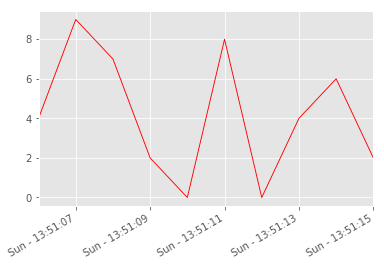

In [0]:
graph_data(database=db, query=sql_query, dateformat=dateformatter)

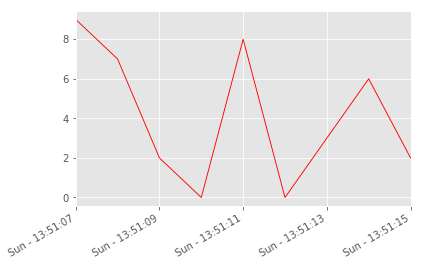

In [0]:
graph_data(database=database_backup, query=sql_query, dateformat=dateformatter)

#SQLite and Pandas

## Pandas and SQL comparisson

### Read the CSV file in Pandas

In [304]:
import pandas as pd
import numpy as np

url = 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/data/tips.csv'

tips = pd.read_csv(url)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Save the CSV file in 

In [0]:
import sqlite3

cnx = sqlite3.connect('tips.db')
tips.to_sql(name='tips', con=cnx)

### FOLLOW COMPARISSON WITH SQL FOR REFERENCE


[Let's go to Pandas Doc on SQL comparisson](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html)

## Working with Pandas from SQLite

We will be working with flights datasets in order to see the interactions between SQLite and Pandas. 

### Download DB to your machine/drive

In [306]:
!wget "https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/flights.db"

--2019-10-06 19:57:40--  https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/flights.db
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/flights.db [following]
--2019-10-06 19:57:41--  https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/flights.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5415936 (5.2M) [application/octet-stream]
Saving to: ‘flights.db.1’

flights.db.1        100%[===================>]   5.17M  --.-KB/s    in 0.07s   

2019-10-06

### Set some util functions

In [0]:
import sqlite3

def create_connect_database(db_name):
    """Opens connection or creates it if it is not existent"""
    connection = sqlite3.connect(db_name)
    cursor = connection.cursor()
    
    return connection, cursor

def commit_close(conn, c, close_connection=True):
    """Commits to connection DB and closes it if close is True"""
    conn.commit()

    if close_connection is True:
        c.close()
        conn.close()
    elif close_connection is False:
        pass

### Get the tables present in the DB

In [308]:
import sqlite3

connection, cursor = create_connect_database('flights.db')

cursor.execute("SELECT name FROM SQLite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('airports',), ('airlines',), ('routes',)]


### Get columns present in each table

In [309]:
for table in tables:
    print("Table name", table[0])
    cursor.execute('PRAGMA TABLE_INFO({});'.format(table[0]))

    # collect names in a list
    names = [tup[1] for tup in cursor.fetchall()]
    print(names)

Table name airports
['index', 'id', 'name', 'city', 'country', 'code', 'icao', 'latitude', 'longitude', 'altitude', 'offset', 'dst', 'timezone']
Table name airlines
['index', 'id', 'name', 'alias', 'iata', 'icao', 'callsign', 'country', 'active']
Table name routes
['index', 'airline', 'airline_id', 'source', 'source_id', 'dest', 'dest_id', 'codeshare', 'stops', 'equipment']


### Get number of rows per table

In [310]:
for table in tables:
    num_rows = cursor.execute('SELECT COUNT(*) FROM {};'.format(table[0]))
    values = num_rows.fetchone()
    print("Table", table[0], "contains", values[0], "rows")

Table airports contains 8107 rows
Table airlines contains 6048 rows
Table routes contains 67663 rows


In [0]:
commit_close(conn=connection, c=cursor, close_connection=True)

### Getting SQL query into pandas DF

We can use pandas to read from a SQLite database, turning a query into a `DataFrame`.

In [312]:
import pandas as pd
import sqlite3

connection, cursor = create_connect_database("flights.db")

# Select everything from airlines table but limit to 20 rows
df = pd.read_sql_query("SELECT * FROM airlines LIMIT 20;", conn)
df.head()

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,3,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N
4,4,5,213 Flight Unit,\N,None,TFU,None,Russia,N


In [0]:
df["country"]

0               None
1      United States
2       South Africa
3     United Kingdom
4             Russia
5             Russia
6             Russia
7     United Kingdom
8      United States
9      United States
10          Thailand
11            Canada
12         Australia
13         Singapore
14           Belgium
15    United Kingdom
16            Canada
17            Mexico
18            Mexico
19             Spain
Name: country, dtype: object

### Save the `DataFrame` to a CSV

In [0]:
# This will save this `DataFrame` with the queried SQL to a csv
df.to_csv(path_or_buf="dataframe.csv")

In [0]:
commit_close(conn=connection, c=cursor, close_connection=True)

### Read from SQL example and plotting spatially: airport locations

Instead of saving the whole table into a `DataFrame`, for bigger tables is more efficient to operate directly with SQL queries loading the queries as `DataFrame`.

Since the table has longitude and latitude, we can retrieve them to plot them.

We will use the SQL CAST function to retrieve them to  converts a value (of any type) into a specified datatype.
 




#### Geopandas installation

In [0]:
!pip install geopandas

In [0]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Try the SQL query before in DB Browser

sql_string = "SELECT CAST(longitude AS float) AS LONG, \
CAST(latitude AS float) AS LAT FROM airports; "

airport_locations = pd.read_sql_query(sql_string, conn)
airport_locations.head()

,LONG,LAT
0,145.391881,-6.081689
1,145.788700,-5.207083
2,144.295861,-5.826789
3,146.726242,-6.569828
4,147.220050,-9.443383


#### Convert `DataFrame` to `GeoDataFrame`

In [0]:
gdf = geopandas.GeoDataFrame(airport_locations, 
                             geometry=geopandas.points_from_xy(airport_locations.LONG, 
                                                               airport_locations.LAT))

gdf.head()

,LONG,LAT,geometry
0,145.391881,-6.081689,POINT (145.39188 -6.08169)
1,145.788700,-5.207083,POINT (145.78870 -5.20708)
2,144.295861,-5.826789,POINT (144.29586 -5.82679)
3,146.726242,-6.569828,POINT (146.72624 -6.56983)
4,147.220050,-9.443383,POINT (147.22005 -9.44338)


#### Plotting the airports in a map

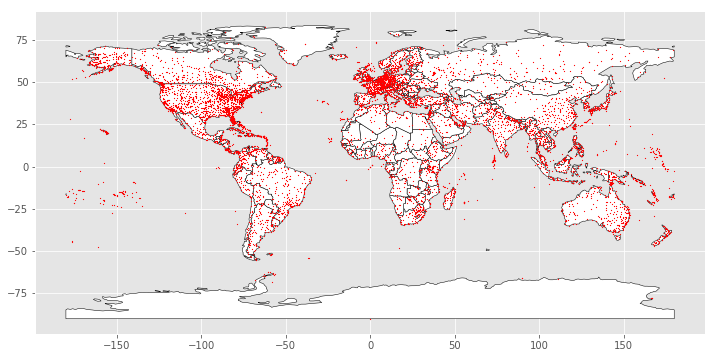

In [0]:
# Retrieve a basemap for the whole world
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#continent = world.query('continent == "Europe"')

# We plot the whole world.
fig, ax = plt.subplots(1, figsize=(12,13))

ax = world.plot(ax=ax, color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, marker='o', color='red', markersize=0.5)

plt.show()

### Read from SQL example and plotting spatially: airport locations in Spain

In [0]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Try the SQL query before in DB Browser

sql_string_spain = "SELECT CAST(longitude AS float) AS LONG, \
CAST(latitude AS float) AS LAT FROM airports WHERE country='Spain'; "

airport_locations_spain = pd.read_sql_query(sql_string_spain, conn)
airport_locations_spain.head()

,LONG,LAT
0,-13.863761,28.452717
1,-17.887056,27.814847
2,-17.755611,28.626478
3,-15.386586,27.931886
4,-13.605225,28.945464


#### Convert `DataFrame` to `GeoDataFrame`

In [0]:
gdf_spain = geopandas.GeoDataFrame(airport_locations_spain, 
                             geometry=geopandas.points_from_xy(airport_locations_spain.LONG, 
                                                               airport_locations_spain.LAT))

gdf_spain.head()

,LONG,LAT,geometry
0,-13.863761,28.452717,POINT (-13.86376 28.45272)
1,-17.887056,27.814847,POINT (-17.88706 27.81485)
2,-17.755611,28.626478,POINT (-17.75561 28.62648)
3,-15.386586,27.931886,POINT (-15.38659 27.93189)
4,-13.605225,28.945464,POINT (-13.60523 28.94546)


#### Plotting the airports in a map

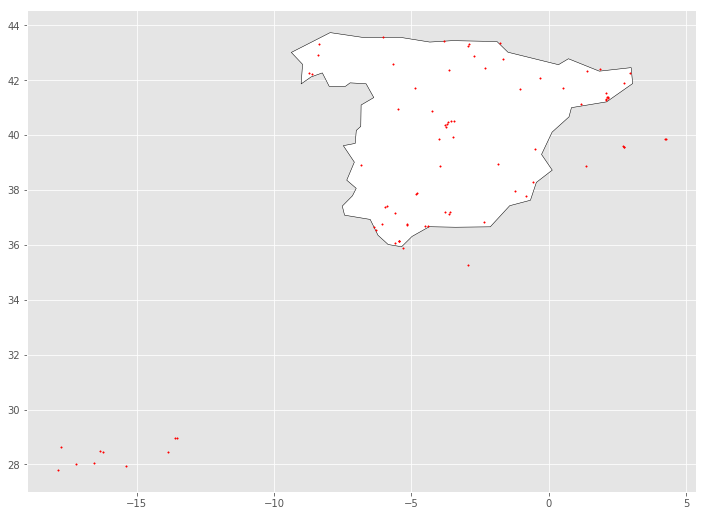

In [0]:
# Retrieve a basemap for the whole world
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
spain = world.query('name == "Spain"')

# We plot the whole world.
fig, ax_spain = plt.subplots(1, figsize=(12,13))

ax_spain = spain.plot(ax=ax_spain, color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf_spain.plot(ax=ax_spain, marker='o', color='red', markersize=2)

plt.show()

### Read from SQL example and plotting spatially: routes

In [0]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Try the SQL query before in DB Browser

sql_string_routes = "SELECT CAST(source_air.longitude AS float) AS source_lon, \
CAST(source_air.latitude AS float) AS source_lat, \
CAST(destination_air.longitude AS float) AS dest_lon, \
CAST(destination_air.latitude AS float) AS dest_lat \
FROM routes \
INNER JOIN airports source_air ON source_air.id = routes.source_id \
INNER JOIN airports destination_air ON destination_air.id = routes.dest_id"

airport_locations_routes = pd.read_sql_query(sql_string_routes, conn)
airport_locations_routes.head()

,source_lon,source_lat,dest_lon,dest_lat
0,39.956589,43.449928,49.278728,55.606186
1,48.006278,46.283333,49.278728,55.606186
2,48.006278,46.283333,43.081889,44.225072
3,61.503333,55.305836,49.278728,55.606186
4,61.503333,55.305836,82.650656,55.012622


#### Create LineString geometry from the source/destination points

In [0]:
from shapely.geometry import Point, LineString

point_source = [Point(xy) for xy in zip(airport_locations_routes.source_lon, airport_locations_routes.source_lat)]
point_dest = [Point(xy) for xy in zip(airport_locations_routes.dest_lon, airport_locations_routes.dest_lat)]

linestring = [LineString(xy) for xy in zip(point_source, point_dest)]

gdf_routes_lines = geopandas.GeoDataFrame(airport_locations_routes, geometry=linestring)
gdf_routes_lines.head()

,source_lon,source_lat,dest_lon,dest_lat,geometry
0,39.956589,43.449928,49.278728,55.606186,"LINESTRING (39.95659 43.44993, 49.27873 55.60619)"
1,48.006278,46.283333,49.278728,55.606186,"LINESTRING (48.00628 46.28333, 49.27873 55.60619)"
2,48.006278,46.283333,43.081889,44.225072,"LINESTRING (48.00628 46.28333, 43.08189 44.22507)"
3,61.503333,55.305836,49.278728,55.606186,"LINESTRING (61.50333 55.30584, 49.27873 55.60619)"
4,61.503333,55.305836,82.650656,55.012622,"LINESTRING (61.50333 55.30584, 82.65066 55.01262)"


#### Plotting the routes in a map

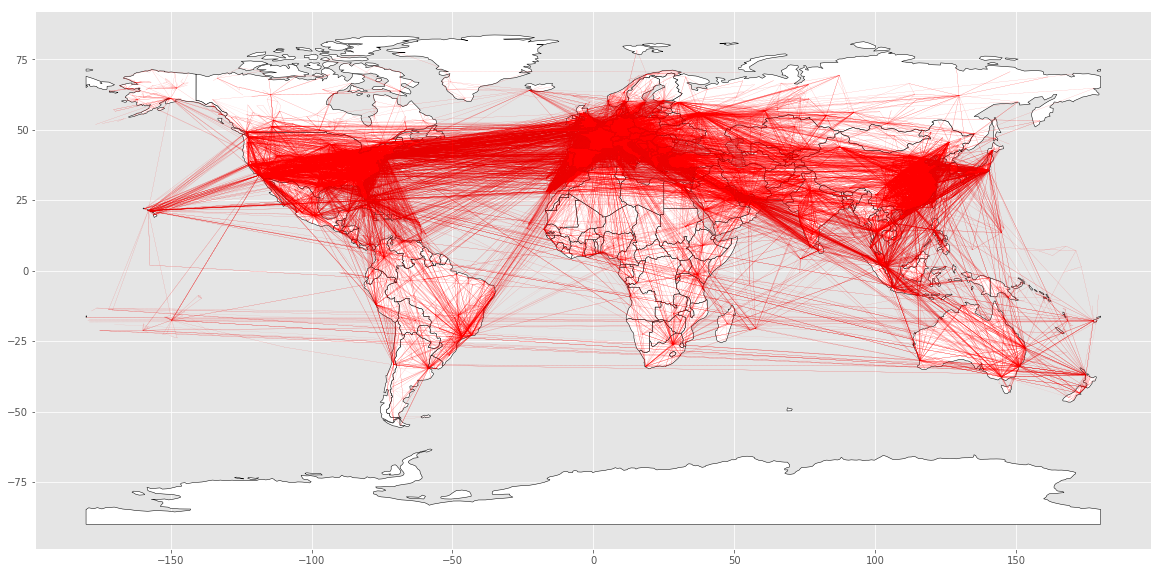

In [0]:
# Retrieve a basemap for the whole world
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We plot the whole world.
fig, ax = plt.subplots(1, figsize=(20,20))

ax = world.plot(ax=ax, color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf_routes_lines.plot(ax=ax, color='red', linestyle='dotted', linewidth=0.1)

plt.show()

#In class exercise 1: mapping flights 

Perform some SQL query over the flight dataset and do the following:

* Query the airports present in your country. Plot them
* Query the airlines present in your country. What percentage of them are active?
* Query through routes sourcing from your country. Plot them.
* What about only active airlines? Plot them.
* Which is the most country visited from Spain (not counting Spain)?
* And the least countries visited?


## Query the airports present in your country. Plot them


In [0]:
# Done for me above

## Query the airlines present in your country. What percentage of them are active?

In [376]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Try the SQL query before in DB Browser

airlines = "SELECT name, active FROM airlines WHERE country='Spain';"

airlines = pd.read_sql_query(airlines, conn)
airlines.head()

,name,active
0,Aero Albatros,N
1,Aerea Flying Training Organization,N
2,Audeli Air,N
3,Air Europa,Y
4,Aero Madrid,N


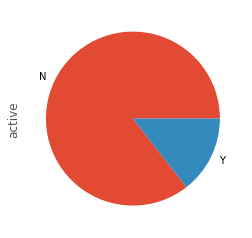

In [383]:
airlines["active"].value_counts(normalize=True)

In [0]:
airlines["active"].value_counts(normalize=True).plot.pie()

## Query through routes sourcing from your country. Plot them.

In [325]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Try the SQL query before in DB Browser

sql_string_source = "SELECT CAST(source_air.longitude AS float) AS source_lon, \
CAST(source_air.latitude AS float) AS source_lat, \
CAST(destination_air.longitude AS float) AS dest_lon, \
CAST(destination_air.latitude AS float) AS dest_lat, \
CAST(source_air.country AS TEXT) AS source_country, \
CAST(destination_air.country AS TEXT) AS destination_country \
FROM routes \
INNER JOIN airports source_air \
  ON source_air.id = routes.source_id \
INNER JOIN airports destination_air \
  ON destination_air.id = routes.dest_id \
WHERE source_air.country = 'Spain'"

airport_source = pd.read_sql_query(sql_string_source, conn)
airport_source.head()

,source_lon,source_lat,dest_lon,dest_lat,source_country,destination_country
0,-13.863761,28.452717,-15.386586,27.931886,Spain,Spain
1,-13.863761,28.452717,-15.386586,27.931886,Spain,Spain
2,-13.863761,28.452717,-13.605225,28.945464,Spain,Spain
3,-13.863761,28.452717,-16.572489,28.044475,Spain,Spain
4,-13.863761,28.452717,-16.572489,28.044475,Spain,Spain


In [359]:
from shapely.geometry import Point, LineString

point_source = [Point(xy) for xy in zip(airport_source.source_lon, airport_source.source_lat)]
point_dest = [Point(xy) for xy in zip(airport_source.dest_lon, airport_source.dest_lat)]

linestring = [LineString(xy) for xy in zip(point_source, point_dest)]

gdf_source_lines = geopandas.GeoDataFrame(airport_source, geometry=linestring)
gdf_source_lines.head()

,source_lon,source_lat,dest_lon,dest_lat,source_country,destination_country,geometry
0,-13.863761,28.452717,-15.386586,27.931886,Spain,Spain,"LINESTRING (-13.86376 28.45272, -15.38659 27.9..."
1,-13.863761,28.452717,-15.386586,27.931886,Spain,Spain,"LINESTRING (-13.86376 28.45272, -15.38659 27.9..."
2,-13.863761,28.452717,-13.605225,28.945464,Spain,Spain,"LINESTRING (-13.86376 28.45272, -13.60523 28.9..."
3,-13.863761,28.452717,-16.572489,28.044475,Spain,Spain,"LINESTRING (-13.86376 28.45272, -16.57249 28.0..."
4,-13.863761,28.452717,-16.572489,28.044475,Spain,Spain,"LINESTRING (-13.86376 28.45272, -16.57249 28.0..."


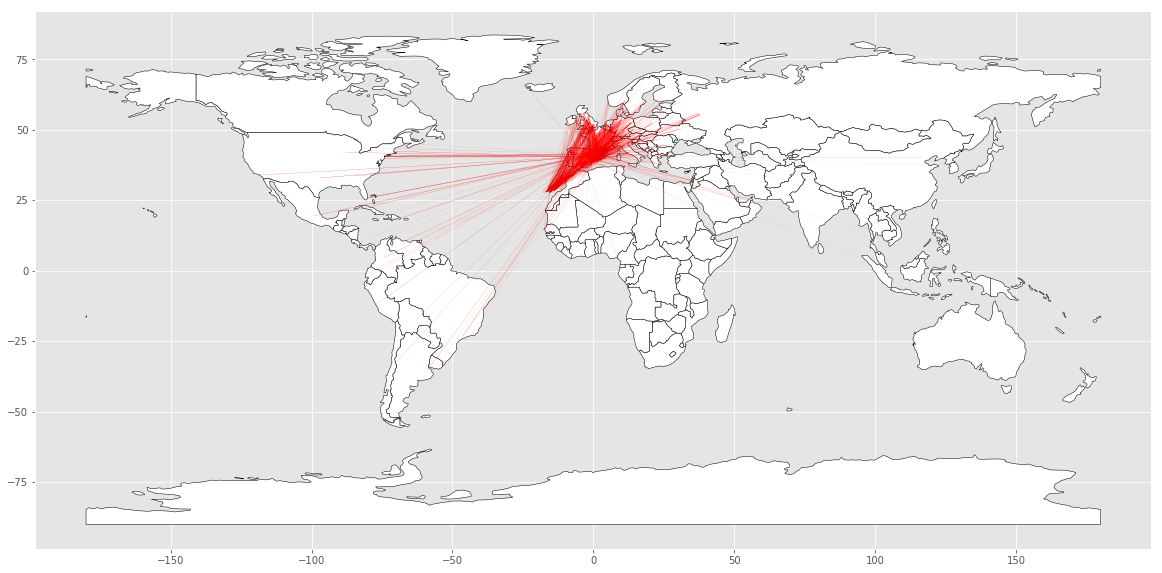

In [360]:
# Retrieve a basemap for the whole world
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We plot the whole world.
fig, ax = plt.subplots(1, figsize=(20,20))

ax = world.plot(ax=ax, color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf_source_lines.plot(ax=ax, color='red', linestyle='dotted', linewidth=0.1)

plt.show()

## What about routes sourcing from only active airlines in your country? Plot them.

In [401]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Try the SQL query before in DB Browser

sql_active_airline_routes = """SELECT cast(air_source.longitude as float) as source_lon,
cast(air_source.latitude as float) as source_lat, 
cast(air_dest.longitude as float) as dest_lon, 
cast(air_dest.latitude as float) as dest_lat, 
cast(air_source.country as TEXT) as source_country, 
cast(a.name as TEXT) as active_airline 
FROM routes r 
INNER JOIN airports air_source  
	ON air_source.id = r.source_id 
INNER JOIN airports air_dest 
	ON air_dest.id = r.dest_id 
INNER JOIN airlines a 
	ON a.id = r.airline_id 
WHERE air_source.country ='Spain' 
	AND a.active = 'Y';"""

active_routes = pd.read_sql_query(sql_active_airline_routes, conn)
active_routes.head()

,source_lon,source_lat,dest_lon,dest_lat,source_country,active_airline
0,-13.863761,28.452717,-15.386586,27.931886,Spain,Binter Canarias
1,-13.863761,28.452717,-16.341536,28.482653,Spain,Binter Canarias
2,-13.863761,28.452717,13.522500,52.380001,Spain,Condor Flugdienst
3,-13.863761,28.452717,8.543125,50.026421,Spain,Condor Flugdienst
4,-13.863761,28.452717,9.988228,53.630389,Spain,Condor Flugdienst


In [402]:
from shapely.geometry import Point, LineString

point_source = [Point(xy) for xy in zip(active_routes.source_lon, active_routes.source_lat)]
point_dest = [Point(xy) for xy in zip(active_routes.dest_lon, active_routes.dest_lat)]

linestring = [LineString(xy) for xy in zip(point_source, point_dest)]

gdf_active_routes = geopandas.GeoDataFrame(active_routes, geometry=linestring)
gdf_active_routes.head()

,source_lon,source_lat,dest_lon,dest_lat,source_country,active_airline,geometry
0,-13.863761,28.452717,-15.386586,27.931886,Spain,Binter Canarias,"LINESTRING (-13.86376 28.45272, -15.38659 27.9..."
1,-13.863761,28.452717,-16.341536,28.482653,Spain,Binter Canarias,"LINESTRING (-13.86376 28.45272, -16.34154 28.4..."
2,-13.863761,28.452717,13.522500,52.380001,Spain,Condor Flugdienst,"LINESTRING (-13.86376 28.45272, 13.52250 52.38..."
3,-13.863761,28.452717,8.543125,50.026421,Spain,Condor Flugdienst,"LINESTRING (-13.86376 28.45272, 8.54312 50.02642)"
4,-13.863761,28.452717,9.988228,53.630389,Spain,Condor Flugdienst,"LINESTRING (-13.86376 28.45272, 9.98823 53.63039)"


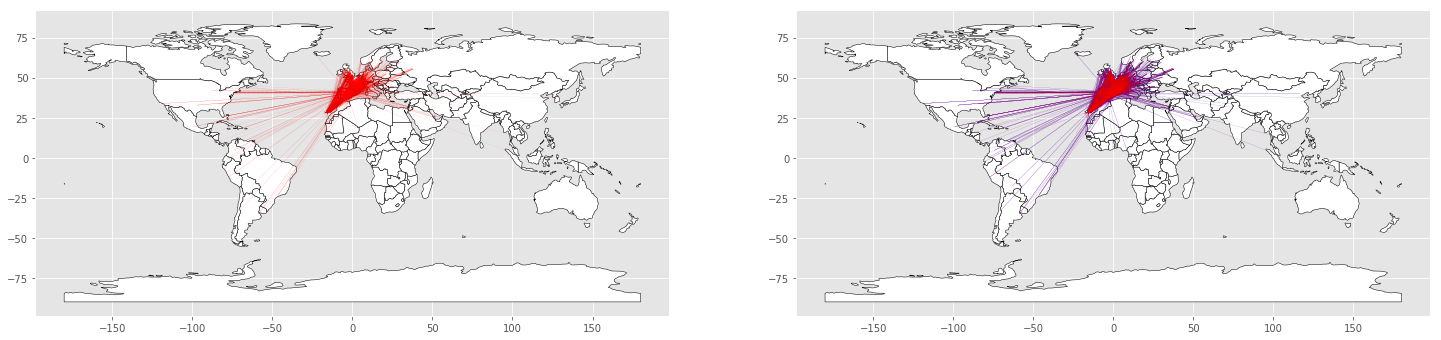

In [403]:
# Retrieve a basemap for the whole world
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We plot the whole world.
fig, ax = plt.subplots(1, 2, figsize=(25,25))

#Axes 1
ax[0] = world.plot(ax=ax[0], color='white', edgecolor='black')
gdf_source_lines.plot(ax=ax[0], color='red', linestyle='dotted', linewidth=0.1)

#Axes 2
ax[1] = world.plot(ax=ax[1], color='white', edgecolor='black')
gdf_active_routes.plot(ax=ax[1], color='blue', linestyle='dashed', linewidth=0.1)
gdf_source_lines.plot(ax=ax[1], color='red', linestyle='dotted', linewidth=0.1)

plt.show()

## Which are the most and least visited countries from Spain?

In [374]:
df_dest = airport_source.groupby(by="destination_country")[["source_country"]].count().reset_index()
df_dest.sort_values(by="source_country", ascending=False)

,destination_country,source_country
61,Spain,579
69,United Kingdom,512
27,Germany,353
25,France,132
35,Italy,120
45,Netherlands,68
63,Switzerland,61
5,Belgium,60
70,United States,57
33,Ireland,53
